In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
df1 = pd.read_csv('C:\\ds\\alt_raw.csv')
df1.head()

,no,trip_start,trip_end,harsh_accl_ctr,harsh_accl_sec,harsh_sev_accl_sec,harsh_brake_ctr,harsh_brake_sec,harsh_sev_brake_sec,harsh_speeding_sec,...,end_odo,sidle_sec,eidle_sec,rdrive_sec,latched_sec,unlatched_sec,dscore,soffset,eoffset,alt_id
0,0,1/17/2020 19:43,1/17/2020 19:49,0,0,0,0,0,0,0,...,20560.078,-1,-1,0,186,0,89.0,-4,-4,WQWRMGR4VXYZYVPF7
1,1,1/17/2020 17:19,1/17/2020 17:28,0,0,0,0,0,0,0,...,20518.125,-1,-1,0,533,3,89.0,-4,-4,WQWRMGR4VXYZYVPF7
2,2,1/17/2020 20:50,1/17/2020 21:25,0,0,0,0,0,0,0,...,20593.953,-1,-1,0,1975,38,89.0,-4,-4,WQWRMGR4VXYZYVPF7
3,3,1/17/2020 19:17,1/17/2020 19:42,0,0,0,1,1,0,0,...,20558.531,-1,-1,0,1477,0,80.0,-4,-4,WQWRMGR4VXYZYVPF7
4,4,1/17/2020 11:35,1/17/2020 12:02,0,0,0,0,0,0,0,...,20510.938,-1,-1,0,1564,84,94.0,-4,-4,WQWRMGR4VXYZYVPF7


In [4]:
df1.shape
df1.describe()

,no,harsh_accl_ctr,harsh_accl_sec,harsh_sev_accl_sec,harsh_brake_ctr,harsh_brake_sec,harsh_sev_brake_sec,harsh_speeding_sec,harsh_speeding_cnt,begin_odo,end_odo,sidle_sec,eidle_sec,rdrive_sec,latched_sec,unlatched_sec,dscore,soffset,eoffset
count,30744.000000,30744.000000,30744.000000,30744.000000,30744.000000,30744.000000,30744.000000,30744.000000,30744.000000,30744.000000,30744.000000,30744.000000,30744.000000,30744.000000,30744.00000,30744.000000,30725.000000,30744.000000,30744.000000
mean,15371.500000,1.349694,1.956382,0.141361,0.432475,0.649200,0.217799,6.994796,0.366836,46657.786878,46673.031362,15768.677693,15492.600377,10.106395,868.67096,68.753936,72.353165,-5.770557,-5.770654
std,8875.172674,2.237627,3.496442,0.704760,0.986059,1.595129,0.763170,56.056302,2.481122,40023.374972,40026.507469,37887.577691,37593.142592,209.600419,1108.25552,347.935584,64.165791,1.410592,1.410504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.422000,41.656000,-1.000000,-1.000000,0.000000,0.00000,0.000000,-994.000000,-10.000000,-10.000000
25%,7685.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14967.878750,14986.133000,-1.000000,-1.000000,0.000000,219.00000,0.000000,85.000000,-7.000000,-7.000000
50%,15371.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37879.000000,37889.414000,-1.000000,-1.000000,0.000000,568.00000,5.000000,89.000000,-7.000000,-7.000000
75%,23057.250000,2.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,66720.305000,66726.722500,14823.250000,14360.000000,0.000000,1172.25000,35.000000,94.000000,-4.000000,-4.000000
max,30743.000000,42.000000,61.000000,24.000000,19.000000,26.000000,17.000000,1848.000000,67.000000,353702.656000,353711.438000,778544.000000,778591.000000,14400.000000,32255.00000,30598.000000,100.000000,-2.000000,-2.000000


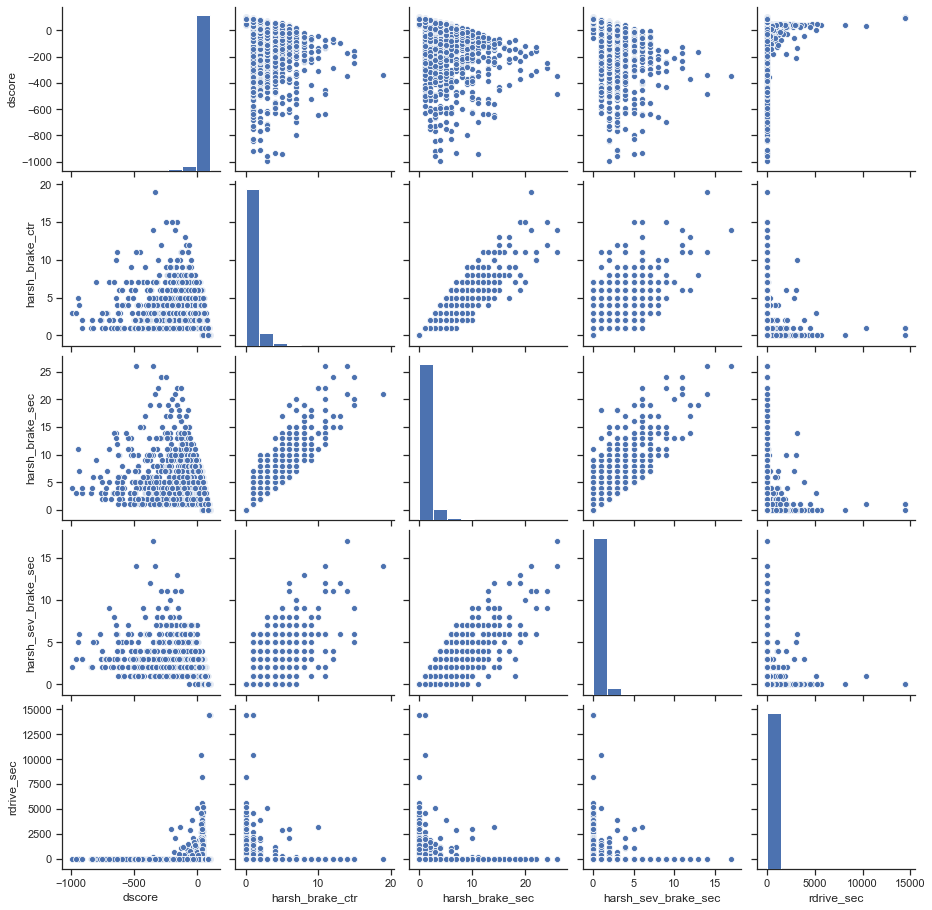

In [5]:

data1 = df1[['dscore','harsh_brake_ctr','harsh_brake_sec','harsh_sev_brake_sec','rdrive_sec']]
import seaborn as sns

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data1)
plt.show() 


In [6]:
min = data1['dscore'].min()
print (min)
max = data1['dscore'].max()
print (max)

-994.0
100.0


In [7]:
r, c = data1.shape
print(r)
print ( c)

30744
5


In [8]:
###clear empty rows
data2 = data1.dropna(subset = ["dscore"])
r, c = data1.shape
print(r)
print ( c)
###pick only 0 and above
data3 = data2[data2 ["dscore"] >= 0]
r, c = data3.shape
print(r)
print ( c)


30744
5
28863
5


In [9]:
from sklearn.utils import resample
# pick 5K rows..
poc = resample(data3, n_samples=5000)
poc.describe()


,dscore,harsh_brake_ctr,harsh_brake_sec,harsh_sev_brake_sec,rdrive_sec
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,84.942400,0.304600,0.412400,0.083200,8.427000
std,15.882063,0.701653,0.992836,0.359866,132.680452
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,89.000000,0.000000,0.000000,0.000000,0.000000
50%,89.000000,0.000000,0.000000,0.000000,0.000000
75%,94.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,7.000000,9.000000,4.000000,3584.000000


In [10]:
##For now, let's focus on good scores 
min = poc['dscore'].min()
print (min)
max = poc['dscore'].max()
print (max)
poc.shape

1.0
100.0


(5000, 5)

In [11]:
cdf = poc[['dscore','harsh_brake_ctr','harsh_brake_sec','harsh_sev_brake_sec','rdrive_sec']]

In [12]:
cdf.head(5)

,dscore,harsh_brake_ctr,harsh_brake_sec,harsh_sev_brake_sec,rdrive_sec
27586,89.0,0,0,0,0
4552,94.0,0,0,0,0
28172,89.0,0,0,0,0
21923,94.0,0,0,0,0
6264,89.0,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split

x = cdf.drop(columns='dscore')
y = cdf['dscore']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [14]:
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (1000, 4)
y_test shape: (1000,)


In [15]:
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (4000, 4)
y_train shape: (4000,)


In [16]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)


In [17]:
### y = c+ m1.x1 +m2.x2 + m3.x3
### y is score. m1 coefficient for ha(indepennt/feature..) m2..HB....

from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

# The coefficients
print('Coefficients:', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients: [ -2.68447666  -7.01155876 -20.45269935  -0.02333065]
Intercept:  90.56449204265077


In [18]:
cdf_df = pd.DataFrame(regr.coef_,x_test.columns,columns=['coeffic'])
cdf_df

,coeffic
harsh_brake_ctr,-2.684477
harsh_brake_sec,-7.011559
harsh_sev_brake_sec,-20.452699
rdrive_sec,-0.023331


In [19]:
regr.score(x_test, y_test)

0.8163853528995038

In [20]:
from sklearn.metrics import r2_score
y_test_pred = regr.predict(x_test)
type(y_test_pred)

numpy.ndarray

In [21]:
### now let's try errors
from sklearn.metrics import  mean_squared_error,r2_score
mse= mean_squared_error(y_test,y_test_pred)
r_squared = r2_score(y_test,y_test_pred)

print("Mean absolute error:",mse)
print("R2-score:",r_squared)

Mean absolute error: 47.85665161042608
R2-score: 0.8163853528995038


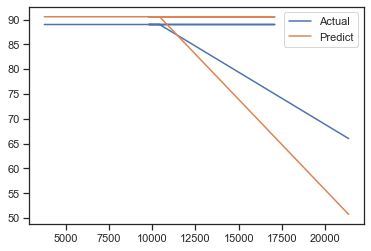

In [22]:
display = pd.DataFrame({"Actual": y_test, "Predict": y_test_pred}).head()
display.plot()

In [23]:
print("Training set score: {:.2f}".format(regr.score(x_train, y_train)))
print("Test set score: {:.2f}".format(regr.score(x_test, y_test)))

Training set score: 0.84
Test set score: 0.82


In [24]:
#Math Ridge penalizes the squared L2 norm of the coeff,,distance...

from sklearn.linear_model import Ridge

ridge = Ridge().fit(x_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(x_test, y_test)))

Training set score: 0.84
Test set score: 0.82


In [25]:
##Math...lasso penalizes the L1 norm of the coefficient vector

from sklearn.linear_model import Lasso

lasso = Lasso().fit(x_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(x_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.80
Test set score: 0.78
Number of features used: 3


In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(x_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test, y_test)))

Training set score: 0.565
Test set score: 0.580


C:\Users\Rammu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 101)
dtr.fit(x_train,y_train)
y_test_pre = dtr.predict(x_test) 

print("Training set score: {:.3f}".format(logreg.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test, y_test)))


Training set score: 0.565
Test set score: 0.580


In [28]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 101)

rfr.fit(x_train,y_train)
y_test_pre = dtr.predict(x_test) 

print("Training set score: {:.3f}".format(logreg.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test, y_test)))

Training set score: 0.565
Test set score: 0.580


In [29]:
###Based on docs actually possible to make good forecasts with tree-based models...
###try risk_time in to mix
##for tomorrow. 11PM.